<a href="https://colab.research.google.com/github/titusjscott/IE-7860-Assignments/blob/main/activity_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.colors import TwoSlopeNorm
from pandas._libs.tslibs.timezones import tz_standardize
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install umap-learn
!pip install pynndescent
!pip install datashader
import scipy
import sklearn
import numba
import pynndescent
import matplotlib
import datashader
import holoviews
import umap
import umap.plot
from sklearn.datasets import load_digits
!pip install boruta
from boruta import BorutaPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=8bccb0e56f5ef713afff60ec6fd9cc6eb533bc1d4d3dc0487e4816942932bee0
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=e3a4ea1f433cbb587f897dc2c090d8d545cce37b1ee330056a3b2bc4c1b9577b
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [2]:
test = pd.read_csv("https://www.dropbox.com/s/l8z80fil8qrq2hm/activity_recognition_test.csv?dl=1")
train = pd.read_csv("https://www.dropbox.com/s/cshltwdjo4xdgty/activity_recognition_train.csv?dl=1")

In [3]:
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (7352, 563)
test shape:  (2947, 563)


In [4]:
#Check for NaN values

print("Null values in train: ", format(train.isnull().values.sum()))
print("Null values in test: ", format(test.isnull().values.sum()))

Null values in train:  0
Null values in test:  0


In [5]:
#Check for duplicates

print("Number of duplicates in train :", train.duplicated().sum())
print("Number of duplicates in test :", test.duplicated().sum())

Number of duplicates in train : 0
Number of duplicates in test : 0


In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


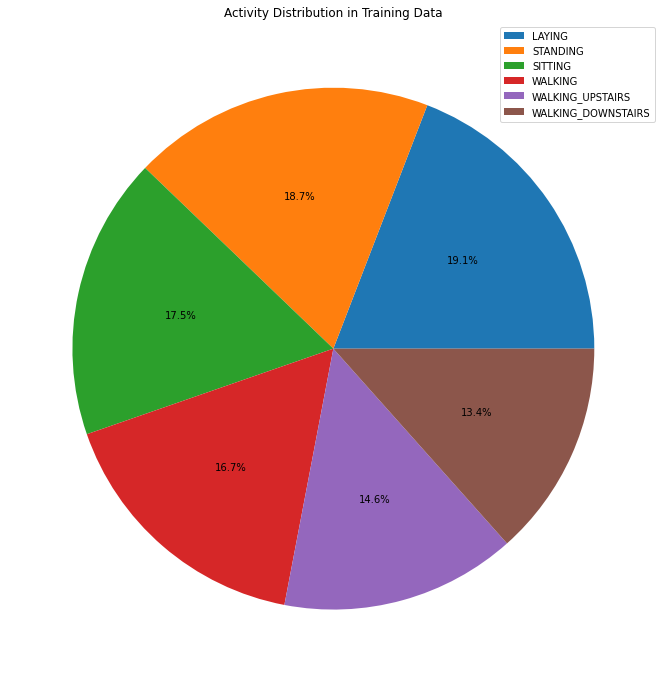

In [8]:
# Check for class distribution for training dataset

# Pie Chart for Activity distribution from Training dataframe
plt.figure(figsize=(12, 12))

# Count the frequency of each activity
activity_counts = train['Activity'].value_counts()

# Create a pie chart with labels and percentages
plt.pie(activity_counts, autopct='%1.1f%%')

# Add a title
plt.title('Activity Distribution in Training Data')

# Add the counts as a legend
plt.legend(labels=activity_counts.index, loc="best")

# Display the chart
plt.show()     

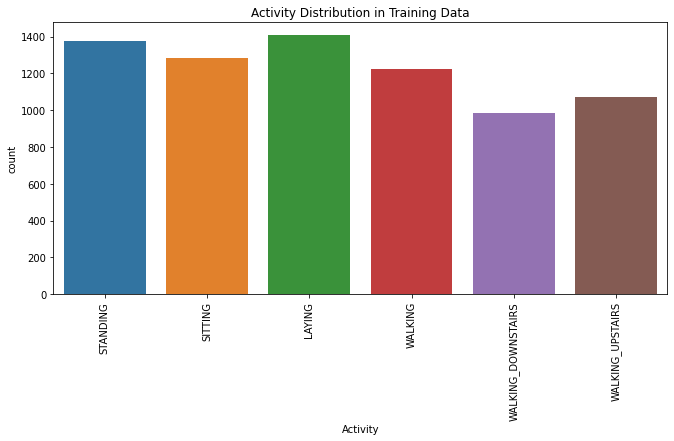

In [9]:
plt.figure(figsize=(11,5))
ax = sns.countplot(x="Activity", data=train)
plt.xticks(x = train['Activity'],  rotation='vertical')
plt.title('Activity Distribution in Training Data')
plt.show()

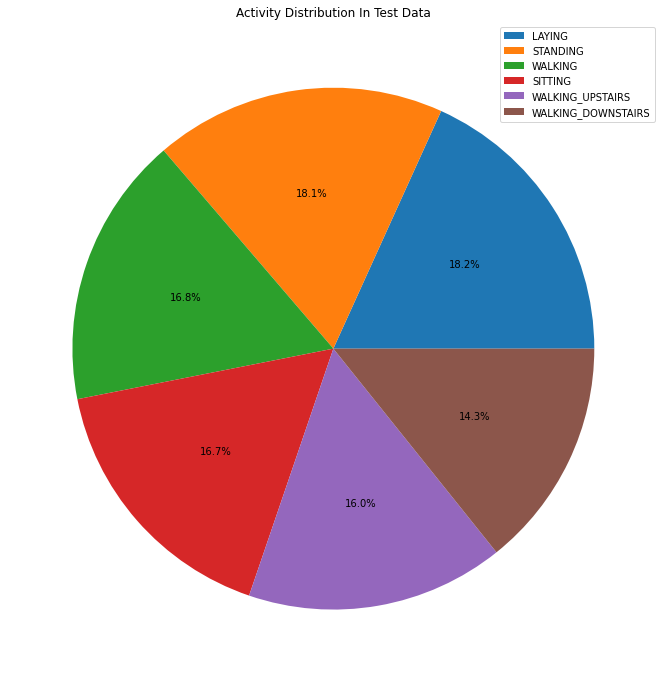

In [10]:
# Pie Chart for Activity distribution from Test dataframe
plt.figure(figsize=(12, 12))

# Count the frequency of each activity
activity_counts = test['Activity'].value_counts()

# Create a pie chart with labels and percentages
plt.pie(activity_counts, autopct='%1.1f%%')

# Add a title
plt.title('Activity Distribution In Test Data')

# Add the counts as a legend
plt.legend(labels=activity_counts.index, loc="upper right")

# Display the chart
plt.show()

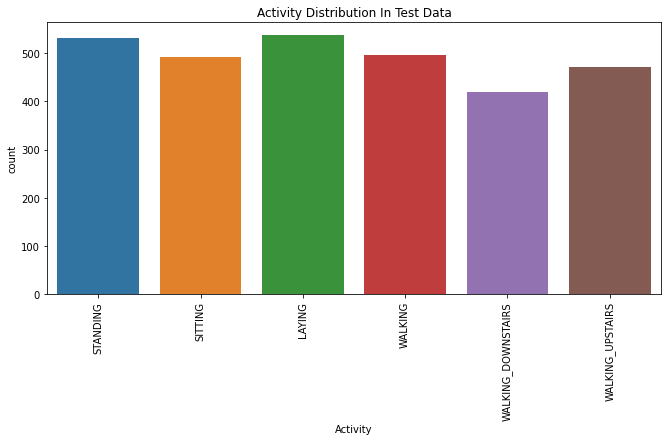

In [11]:
plt.figure(figsize=(11,5))
ax = sns.countplot(x="Activity", data=test)
plt.xticks(x = test['Activity'],  rotation='vertical')
plt.title('Activity Distribution In Test Data')
plt.show()

In [12]:
# Create a histogram of the subject column for the train df
px.histogram(data_frame=train, x="subject", color="Activity",barmode='group')


In [13]:
# Create a histogram of the subject column for the test df
px.histogram(data_frame=test, x="subject", color="Activity",barmode='group')

This shows us that the Training data was all the information received from 21 of the 30 Subjects while the Testing data was all the information received from the remaining 9 subjects. Lets combine the data to make sure that the data still looks consistent and fairly balanced as a whole.

In [14]:
# combine train and test dataframes into one to get big picture of data

df = pd.concat([train, test])

df.head()
     

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [15]:
# Create a histogram of the subject column for the entire df
px.histogram(data_frame=df, x="subject", color="Activity",barmode='group')

Now we have representation of all the Subjects, lets revisit the class balance.

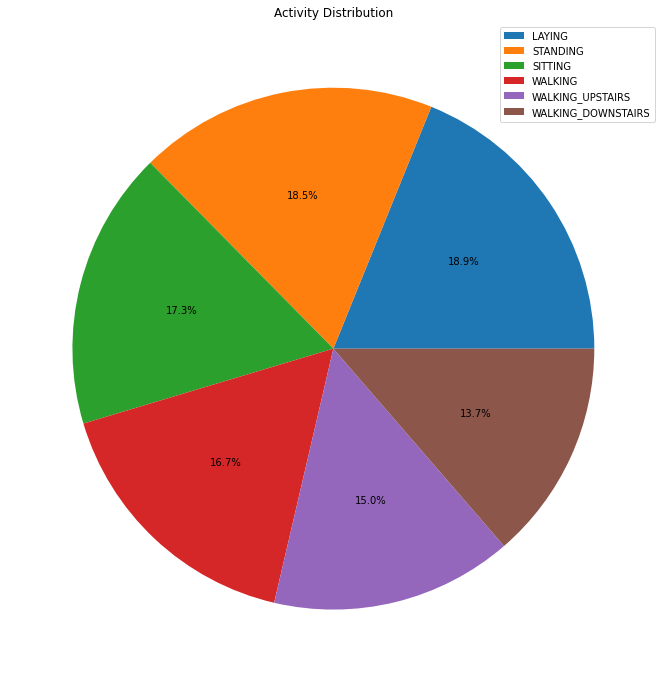

In [16]:
# Create a figure to identify distribution of Activities from entire Data Set
plt.figure(figsize=(12, 12))

# Count the frequency of each activity
activity_counts = df['Activity'].value_counts()

# Create a pie chart with labels and percentages
plt.pie(activity_counts, autopct='%1.1f%%')

# Add a title
plt.title('Activity Distribution')

# Add the counts as a legend
plt.legend(labels=activity_counts.index, loc="best")

# Display the chart
plt.show()

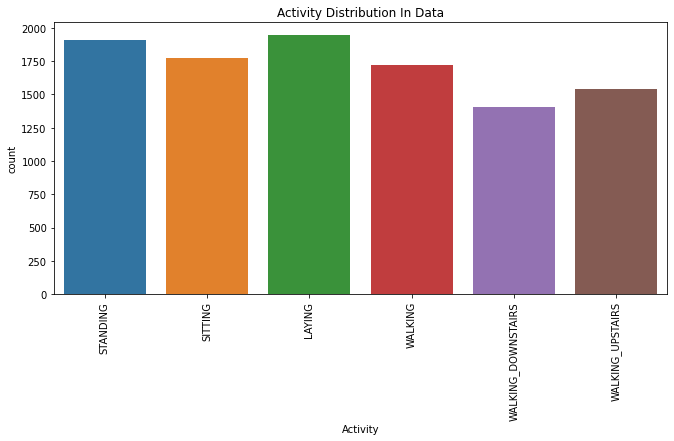

In [17]:
plt.figure(figsize=(11,5))
ax = sns.countplot(x="Activity", data=df)
plt.xticks(x = df['Activity'],  rotation='vertical')
plt.title('Activity Distribution In Data')
plt.show()

Let's start to explore some correlations

<Axes: >

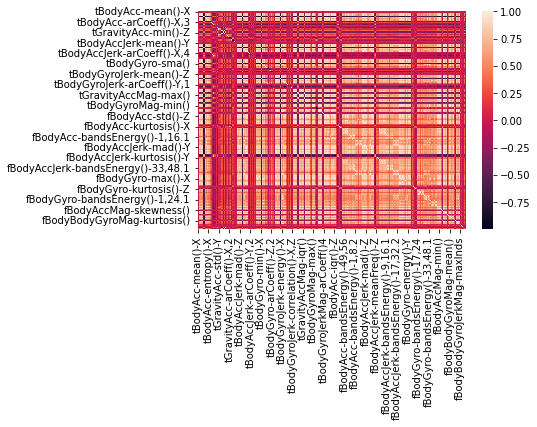

In [18]:
# Create a heatmap
corr=df.corr()

sns.heatmap(corr)

There are far too many features to be able to clearly see the correlations at this point, so lets do some feature selection to begin to narrow down the options. 

In [19]:
# Split the dataframe into features and target variable
X = df.drop('Activity', axis=1)
y = df['Activity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print('X Train shape:', X_train.shape)
print('X Test shape:', X_test.shape)
print('Y Train shape:', y_train.shape)
print('Y Test shape:', y_test.shape)

X Train shape: (8239, 562)
X Test shape: (2060, 562)
Y Train shape: (8239,)
Y Test shape: (2060,)


In [20]:
# Change the Activity column to numerical data

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
     

In [21]:
# Check to find out if there are other columns that need to be converted to numeric

non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

if len(non_numeric_cols) > 0:
    print(f"The following columns are not numeric: {non_numeric_cols}")
else:
    print("All columns are numeric")
     

The following columns are not numeric: ['Activity']


In [22]:
# Scale the data

scaled = MinMaxScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.fit_transform(X_test)

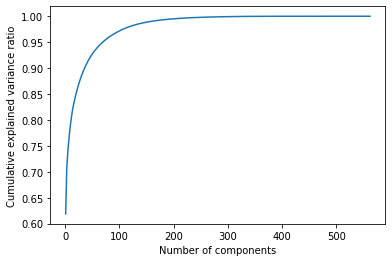

In [23]:
# Instantiate PCA and fit to the data
pca = PCA()
pca.fit(X_train)

# Plot the explained variance ratio as a function of the number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


In [24]:
# Initiate PCA with the desired number of components
n_components = 50  # for example
pca = PCA(n_components=n_components)

# Fit PCA to the training data and transform the data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the fitted PCA
X_test_pca = pca.transform(X_test)

# Access the first principal component and compute the feature importances
first_pc = pca.components_[0]
feature_importances = np.abs(first_pc) / np.sum(np.abs(first_pc))

# Create a pandas DataFrame from feature_importances
df_importance = pd.DataFrame({'Feature index': range(len(feature_importances)), 'Importance': feature_importances})

# Plot the feature importances using plotly.express
fig = px.bar(df_importance, x="Feature index", y="Importance")
fig.show()



In [25]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [26]:
# Perform PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Create scatter plot of the first two principal components, with different colors or markers for each class

fig=px.scatter(
    X_pca, x=0, y=1,
    color=df.Activity
)
fig.show()

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

# Apply UMAP for dimensionality reduction
umap_results = umap.UMAP(n_neighbors=5, min_dist=0.6, n_components=2).fit_transform(X)

# Create a scatter plot of the UMAP results, with each class labeled with a different color
fig=px.scatter(
    umap_results, x=0, y=1,
    color=df.Activity
)
fig.show()


In [ ]:
tsn = TSNE(random_state=87, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X)

fig=px.scatter(
    tsn, x=0, y=1,
    color=df.Activity
)
fig.show()

I attempted to use the Chi square test but learned that it does not work properly with negative values, which are contained in my dataset.

In [ ]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

# Select the top 10 features based on chi-squared statistics

#k = 10
#selector = SelectKBest(chi2, k=k)
#X_new = selector.fit_transform(X, y)

# Print the indices of the selected features
#selected_features_indices = selector.get_support(indices=True)
#print(selected_features_indices)


In [ ]:
# Select the top 10 features based on mutual information
k = 50
selector = SelectKBest(mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)

# Print the indices of the selected features
print(selector.get_support(indices=True))


Decision Tree Model with the mutual information selections

In [ ]:
# Split the data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train a decision tree classifier on the selected features
clf = DecisionTreeClassifier()
clf.fit(X_train_new, y_train_new)

# Predict on the test set
y_pred = clf.predict(X_test_new)

# Evaluate performance using classification report
print(classification_report(y_test_new, y_pred))

SVM with the PCA selection

In [ ]:
# Instantiate the SVM classifier
clf = SVC()

# Train the model on the PCA-transformed training data
clf.fit(X_train_pca, y_train)

# Test the model on the PCA-transformed test data
y_pred = clf.predict(X_test_pca)

# Print the classification report
print(classification_report(y_test, y_pred))


Random Forest with the TSNE selections

In [ ]:
# Split the data into training and testing sets
X_train_tsn, X_test_tsn, y_train_tsn, y_test_tsn = train_test_split(tsn, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the transformed data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tsn, y_train_tsn)

# Evaluate the accuracy of the model on the test data
y_pred = rf.predict(X_test_tsn)
accuracy = accuracy_score(y_test_tsn, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test_tsn, y_pred))


SVM with the TSNE selection

In [ ]:
# Train an SVM on the t-SNE transformed data
svm = SVC(kernel='linear')
svm.fit(X_train_tsn, y_train_tsn)

# Test the SVM on the t-SNE transformed test data
y_pred = svm.predict(X_test_tsn)

# Evaluate the accuracy of the SVM
accuracy = accuracy_score(y_test_tsn, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test_tsn, y_pred))


In [ ]:
# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight='balanced')

# Create a boruta feature selector object with random forest classifier as estimator
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)

# Fit the boruta feature selector object on the training data
boruta_selector.fit(X_train, y_train)


In [ ]:
# Check the selected features
selected_features = X_train.columns[boruta_selector.support_]
print("Selected features:", selected_features)

# Transform the training and testing data using the selected features
X_train_selected = boruta_selector.transform(X_train)
X_test_selected = boruta_selector.transform(X_test)

# Train and evaluate a machine learning model on the selected features
clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

In [ ]:
!pip install -U mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
lin_reg = LinearRegression()

# Define the number of features to select
k_features = 5

# Define the step size for feature selection
step = 1

# Create an instance of the Sequential Forward Selector model
sfs = SFS(lin_reg, 
          k_features=k_features, 
          forward=True, 
          floating=False, 
          verbose=2, 
          scoring='neg_mean_squared_error',
          cv=5)

# Fit the Sequential Forward Selector model to the training data
sfs = sfs.fit(X_train, y_train)

# Print the selected feature indices and column names
print('Selected features:', sfs.k_feature_idx_)
print('Selected feature column names:', X_train.columns[list(sfs.k_feature_idx_)])

# Calculate the R-squared score on the test data using the selected features
r_squared = sfs.score(X_test, y_test)

print('R-squared score:', r_squared)
